In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
len(xtrain)

60000

In [6]:
xtest.shape

(10000, 28, 28)

In [7]:
len(xtest)

10000

**Flatten**

In [8]:
xtrain_flatten = xtrain.reshape(len(xtrain), 28*28)
xtest_flatten=xtest.reshape(len(xtest), 28*28)

In [9]:
len(xtrain_flatten)

60000

In [10]:
xtrain_flatten.shape

(60000, 784)

In [11]:
len(xtest_flatten)

10000

In [12]:
# Normalization

In [13]:
xtrain_flatten=xtrain_flatten/255
xtest_flatten=xtest_flatten/255

In [14]:
xtrain_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
#encoding labels

In [16]:
y_train=to_categorical(ytrain)
y_test=to_categorical(ytest)

In [17]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [18]:
ytest[0]

7

**Model Building**

In [19]:
# model=keras.Sequential([
#     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
# ])

# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# model.fit(xtrain_flatten,y_train,epochs=5)

In [20]:
def baseline_model():#creating a base model
  model = Sequential()
  model.add(Dense(784,input_dim=784,kernel_initializer='normal',activation='relu')) #784
  model.add(Dense(10,kernel_initializer='normal',activation='softmax'))


  #compile model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  model.fit(xtrain_flatten,y_train,validation_data = (xtest_flatten,y_test),epochs=10,batch_size=200)

  model.save('baseline.h5')
  return model

In [21]:
model=baseline_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.8552 - loss: 0.4985 - val_accuracy: 0.9614 - val_loss: 0.1383
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9663 - loss: 0.1206 - val_accuracy: 0.9703 - val_loss: 0.0984
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9788 - loss: 0.0748 - val_accuracy: 0.9781 - val_loss: 0.0740
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9870 - loss: 0.0474 - val_accuracy: 0.9781 - val_loss: 0.0715
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9902 - loss: 0.0355 - val_accuracy: 0.9782 - val_loss: 0.0676
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9931 - loss: 0.0271 - val_accuracy: 0.9806 - val_loss: 0.0636
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9957 - loss: 0.0186 - val_accuracy: 0.9826 - val_loss: 0.0583
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9975 - loss: 0.0128 - val_

In [22]:
# model.fit(xtrain_flatten,y_train,validation_data = (xtest_flatten,y_test),epochs=10,batch_size=200)

**Model Evaluation**

In [23]:
model.evaluate(xtest_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0753


[0.06368409097194672, 0.9801999926567078]

**Prediction**

In [24]:
y_pred = model.predict(xtest_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [25]:
y_pred[0]

array([1.8408906e-08, 6.0484651e-10, 1.3261222e-06, 1.1102220e-04,
       8.5502499e-12, 7.0213257e-09, 1.0050584e-12, 9.9988669e-01,
       7.6875871e-08, 8.2277603e-07], dtype=float32)

In [26]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

**Confusion Metrics**

In [27]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [29]:
cm = tf.math.confusion_matrix(labels=ytest,predictions=y_pred_labels)

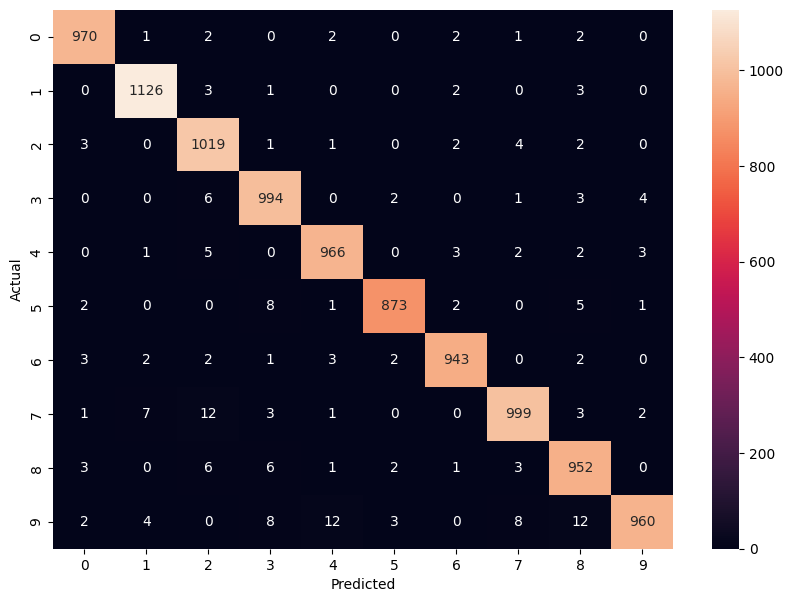

In [30]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
 # it is clear that certain values have predicted incorrectly for example 7 was predicted incorrectly for about 10 times with 2, the higher the diagonal values compared to the off_diagonal values, the better the performance of the model